In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt # For data viz
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm

print('System Version:', sys.version)
print('PyTorch version', torch.__version__)
print('Torchvision version', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

System Version: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
PyTorch version 2.0.1+cu118
Torchvision version 0.15.2+cu118
Numpy version 1.23.5
Pandas version 1.5.3


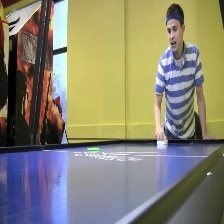

In [28]:
#Lets view an image
from IPython.display import Image
Image('drive/MyDrive/sports_data/train/air hockey/001.jpg')

# Step 1. Pytorch Dataset (and Dataloader)

In [29]:
#Define class
class SportsDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)

    #methods
    def __len__(self):
        return len(self.data)  #Returns length of data

    def __getitem__(self, idx):
        return self.data[idx] #Return item based on index

    @property
    def classes(self):
        return self.data.classes  #Return name of folder

In [30]:
dataset = SportsDataset(
    data_dir='/content/drive/MyDrive/sports_data/train'
)

In [6]:
len(dataset)

13492

In [7]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=224x224>, 0)

0


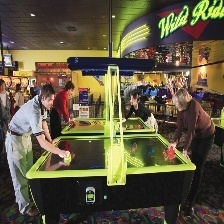

In [8]:
image, label = dataset[40]
print(label)
image

In [9]:
sports_type = dataset.classes
sports_type

['air hockey',
 'ampute football',
 'archery',
 'arm wrestling',
 'axe throwing',
 'balance beam',
 'barell racing',
 'baseball',
 'basketball',
 'baton twirling',
 'bike polo',
 'billiards',
 'bmx',
 'bobsled',
 'bowling',
 'boxing',
 'bull riding',
 'bungee jumping',
 'canoe slamon',
 'cheerleading',
 'chuckwagon racing',
 'cricket',
 'croquet',
 'curling',
 'disc golf',
 'fencing',
 'field hockey',
 'figure skating men',
 'figure skating pairs',
 'figure skating women',
 'fly fishing',
 'football',
 'formula 1 racing',
 'frisbee',
 'gaga',
 'giant slalom',
 'golf',
 'hammer throw',
 'hang gliding',
 'harness racing',
 'high jump',
 'hockey',
 'horse jumping',
 'horse racing',
 'horseshoe pitching',
 'hurdles',
 'hydroplane racing',
 'ice climbing',
 'ice yachting',
 'jai alai',
 'javelin',
 'jousting',
 'judo',
 'lacrosse',
 'log rolling',
 'luge',
 'motorcycle racing',
 'mushing',
 'nascar racing',
 'olympic wrestling',
 'parallel bar',
 'pole climbing',
 'pole dancing',
 'pole vau

In [10]:
len(sports_type)

100

In [31]:
# Get a dictionary associating target values with folder names
data_dir = '/content/drive/MyDrive/sports_data/train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'air hockey', 1: 'ampute football', 2: 'archery', 3: 'arm wrestling', 4: 'axe throwing', 5: 'balance beam', 6: 'barell racing', 7: 'baseball', 8: 'basketball', 9: 'baton twirling', 10: 'bike polo', 11: 'billiards', 12: 'bmx', 13: 'bobsled', 14: 'bowling', 15: 'boxing', 16: 'bull riding', 17: 'bungee jumping', 18: 'canoe slamon', 19: 'cheerleading', 20: 'chuckwagon racing', 21: 'cricket', 22: 'croquet', 23: 'curling', 24: 'disc golf', 25: 'fencing', 26: 'field hockey', 27: 'figure skating men', 28: 'figure skating pairs', 29: 'figure skating women', 30: 'fly fishing', 31: 'football', 32: 'formula 1 racing', 33: 'frisbee', 34: 'gaga', 35: 'giant slalom', 36: 'golf', 37: 'hammer throw', 38: 'hang gliding', 39: 'harness racing', 40: 'high jump', 41: 'hockey', 42: 'horse jumping', 43: 'horse racing', 44: 'horseshoe pitching', 45: 'hurdles', 46: 'hydroplane racing', 47: 'ice climbing', 48: 'ice yachting', 49: 'jai alai', 50: 'javelin', 51: 'jousting', 52: 'judo', 53: 'lacrosse', 54: 'log

In [32]:
#Using transforms function to resize images
transform = transforms.Compose([
    transforms.Resize((128, 128)), #image size
    transforms.ToTensor(), #convert into pytorch tensors
])

data_dir = '/content/drive/MyDrive/sports_data/train'
dataset = SportsDataset(data_dir, transform)

In [13]:
image, label = dataset[0]
image.shape

torch.Size([3, 128, 128])

In [14]:
  # iterate over dataset for verification, the first index
for images, labels in dataset:
    break

In [15]:
images , labels # the labels here show the first index which is airhockey from the dataset

(tensor([[[0.3608, 0.2039, 0.1843,  ..., 0.2196, 0.1216, 0.1176],
          [0.4471, 0.2588, 0.2000,  ..., 0.2510, 0.1216, 0.1176],
          [0.5294, 0.3216, 0.2078,  ..., 0.2980, 0.1216, 0.1176],
          ...,
          [0.2039, 0.2157, 0.2392,  ..., 0.1882, 0.2196, 0.2627],
          [0.1843, 0.2039, 0.2431,  ..., 0.1882, 0.2392, 0.2667],
          [0.1765, 0.2118, 0.2471,  ..., 0.1922, 0.2510, 0.2667]],
 
         [[0.1961, 0.0745, 0.0745,  ..., 0.2000, 0.1176, 0.1137],
          [0.2667, 0.1137, 0.0824,  ..., 0.2353, 0.1176, 0.1137],
          [0.3373, 0.1765, 0.0941,  ..., 0.2824, 0.1176, 0.1176],
          ...,
          [0.2275, 0.2392, 0.2667,  ..., 0.2039, 0.2353, 0.2863],
          [0.2000, 0.2196, 0.2667,  ..., 0.2039, 0.2549, 0.2902],
          [0.1922, 0.2314, 0.2706,  ..., 0.2078, 0.2667, 0.2902]],
 
         [[0.1176, 0.0392, 0.0588,  ..., 0.1098, 0.0745, 0.1020],
          [0.1686, 0.0667, 0.0706,  ..., 0.1373, 0.0784, 0.0980],
          [0.2000, 0.0902, 0.0667,  ...,

# Dataloaders: Batching our dataset

In [33]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True) #32 images at a time, shuffle image at random (typically we only use shuffle during training)



In [34]:
#verify batched dataset
for images, labels in dataloader:
    break

images.shape, labels.shape #shows a batch of 32 images (rgb, imagesize),shows a batch of 32 labels

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [18]:
labels

tensor([53, 59, 13, 79, 97, 52, 43, 66, 45, 25, 69, 93, 30, 80, 38, 30, 76, 94,
        61, 26, 67, 78, 32, 91, 26, 85, 97, 93, 28, 93, 21, 37])

#Step 2: Creating the Pytorch Model

In [35]:
class SportsClassifier(nn.Module):
    def __init__(self, num_classes=100):
        super(SportsClassifier, self).__init__()
        # Where we define all the parts of the model
        self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        enet_out_size = 1280
        # Make a classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(enet_out_size, num_classes)
        )

    def forward(self, x):
        # Connect these parts and return the output
        x = self.features(x)
        output = self.classifier(x)
        return output

In [20]:
#verify model
model = SportsClassifier(num_classes=100)
print(str(model)[:500])

SportsClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)


In [39]:
example_out = model(images)
example_out.shape # [batch_size, num_classes]

torch.Size([32, 1000])

# Pytorch training

In [40]:
# Loss function
criterion = nn.CrossEntropyLoss() #for multi-class classification
# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [41]:
#Test out loss function
criterion(example_out, labels)
print(example_out.shape, labels.shape)

torch.Size([32, 1000]) torch.Size([32])


#Setup Datasets

In [38]:
#Setup our transform (resize image and convert into tensors)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
#data path/directory
train_folder = 'drive/MyDrive/sports_data/train'
valid_folder = 'drive/MyDrive/sports_data/valid'
test_folder = 'drive/MyDrive/sports_data/test'

train_dataset = SportsDataset(train_folder, transform=transform)
val_dataset = SportsDataset(valid_folder, transform=transform)
test_dataset = SportsDataset(test_folder, transform=transform)

#Turn into batches of 32, shuffle only for training
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

#Creating training loop

In [26]:
# Simple training loop
num_epochs = 5
train_losses, val_losses = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #check for gpu(cuda)

model = SportsClassifier(num_classes=100)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc='Training loop'): #progress bar
        # Move inputs and labels to the gpu device
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad() #reset gradient
        outputs = model(images) #forward pass/function
        loss = criterion(outputs, labels) #compute loss
        loss.backward() #computes the gradients.
        optimizer.step() #dates the model's parameters based on these gradients to improve its performance.
        running_loss += loss.item() * labels.size(0) #track the running loss during training
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad(): #disable gradient computation during validation phase
        for images, labels in tqdm(val_loader, desc='Validation loop'):
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")

Training loop:   0%|          | 0/422 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 1/5 - Train loss: 1.559787804671151, Validation loss: 0.7409786648750305


Training loop:   0%|          | 0/422 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 2/5 - Train loss: 0.5593970218646289, Validation loss: 0.6085597777366638


Training loop:   0%|          | 0/422 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 3/5 - Train loss: 0.340271197102595, Validation loss: 0.562871190071106


Training loop:   0%|          | 0/422 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 4/5 - Train loss: 0.27657500761148307, Validation loss: 0.3892876974344254


Training loop:   0%|          | 0/422 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 5/5 - Train loss: 0.22675458262096057, Validation loss: 0.45627438807487486


#Save the model

In [27]:
import os
# Save the model's state dictionary after training in a specific directory
directory_path = 'drive/MyDrive/sports_data/models'
file_name = 'efficientnet_b0.pth'
torch.save(model.state_dict(), os.path.join(directory_path, file_name))

# Load in model

In [25]:
# Create an instance of the model class
model = SportsClassifier(num_classes=100)

# Load the saved model's state dictionary onto the GPU (assuming GPU is available)
model.load_state_dict(torch.load('drive/MyDrive/sports_data/models/efficientnet_b0.pth'))

# Move the model to the GPU for inference
device = torch.device('cuda')  # Specify the GPU device (e.g., 'cuda:0' for the first GPU)
model.to(device)




SportsClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(32, 16, kernel

# Model accuracy on test data

In [26]:
# Test phase
model.eval()
running_loss = 0.0
correct_predictions = 0
total_data_points = 0

with torch.no_grad():  # Disable gradient computation during testing
    for images, labels in tqdm(test_loader, desc='Testing loop'):
        # Move inputs and labels to the device
        images, labels = images.to(device), labels.to(device)

        # Forward pass to get predictions
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * labels.size(0)

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1) # _ used as a placeholder since we dont want to display the max values
        correct_predictions += (predicted == labels).sum().item()
        total_data_points += labels.size(0)

test_loss = running_loss / len(test_loader.dataset)
test_accuracy = (correct_predictions / total_data_points) * 100

print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy:.2f}%")


Testing loop:   0%|          | 0/16 [00:00<?, ?it/s]

Test loss: 0.45627438807487486, Test accuracy: 87.80%


# 2nd training loop with different lr and epoch

In [27]:
# Simple training loop
num_epochs = 10
train_losses, val_losses = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #check for gpu(cuda)

model = SportsClassifier(num_classes=100)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc='Training loop'): #progress bar
        # Move inputs and labels to the gpu device
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad() #reset gradient
        outputs = model(images) #forward pass/function
        loss = criterion(outputs, labels) #compute loss
        loss.backward() #computes the gradients.
        optimizer.step() #dates the model's parameters based on these gradients to improve its performance.
        running_loss += loss.item() * labels.size(0) #track the running loss during training
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad(): #disable gradient computation during validation phase
        for images, labels in tqdm(val_loader, desc='Validation loop'):
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")

Training loop:   0%|          | 0/422 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 1/10 - Train loss: 3.0848379978397076, Validation loss: 1.2954488048553467


Training loop:   0%|          | 0/422 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 2/10 - Train loss: 0.9783652928969007, Validation loss: 0.56653360414505


Training loop:   0%|          | 0/422 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 3/10 - Train loss: 0.4420726158093742, Validation loss: 0.37407311642169955


Training loop:   0%|          | 0/422 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 4/10 - Train loss: 0.21481893085254747, Validation loss: 0.3142036726474762


Training loop:   0%|          | 0/422 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 5/10 - Train loss: 0.10937352061024272, Validation loss: 0.28097568798065187


Training loop:   0%|          | 0/422 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 6/10 - Train loss: 0.062144589760326115, Validation loss: 0.2668457440137863


Training loop:   0%|          | 0/422 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 7/10 - Train loss: 0.04471916174463621, Validation loss: 0.2647861211299896


Training loop:   0%|          | 0/422 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 8/10 - Train loss: 0.031870549882099745, Validation loss: 0.2728987194299698


Training loop:   0%|          | 0/422 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 9/10 - Train loss: 0.026430288032072785, Validation loss: 0.2446727305650711


Training loop:   0%|          | 0/422 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 10/10 - Train loss: 0.021375776033571308, Validation loss: 0.24521637731790544


# Visualize losses

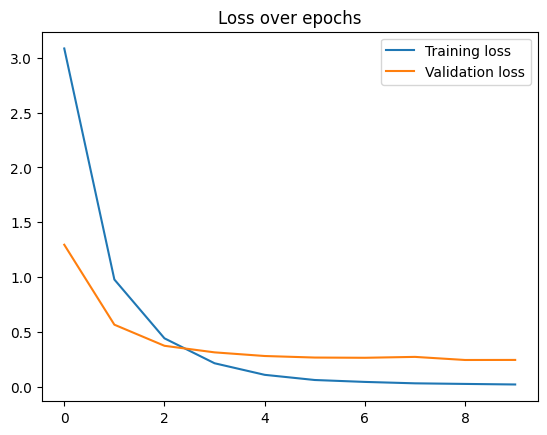

In [30]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

# Save the model

In [28]:
import os
# Save the model's state dictionary after training in a specific directory
directory_path = 'drive/MyDrive/sports_data/models'
file_name = 'efficientnet_b0_v2.pth'
torch.save(model.state_dict(), os.path.join(directory_path, file_name))

# Test 2nd model's accuracy on test dataset

In [31]:
# Test phase
model.eval()
running_loss = 0.0
correct_predictions = 0
total_data_points = 0

with torch.no_grad():  # Disable gradient computation during testing
    for images, labels in tqdm(test_loader, desc='Testing loop'):
        # Move inputs and labels to the device
        images, labels = images.to(device), labels.to(device)

        # Forward pass to get predictions
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * labels.size(0)

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1) # _ used as a placeholder since we dont want to display the max values
        correct_predictions += (predicted == labels).sum().item()
        total_data_points += labels.size(0)

test_loss = running_loss / len(test_loader.dataset)
test_accuracy = (correct_predictions / total_data_points) * 100

print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy:.2f}%")


Testing loop:   0%|          | 0/16 [00:00<?, ?it/s]

Test loss: 0.24521637731790544, Test accuracy: 93.00%


# Evaluating results

In [42]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

# Predict using the model
def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

# Visualization
def visualize_predictions(original_image, probabilities, class_names):
    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))

    # Display image
    axarr[0].imshow(original_image)
    axarr[0].axis("off")

    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

def visualize_top5_predictions(original_image, probabilities, class_names):
    # Get the indices of the top 5 predicted classes
    top5_indices = np.argsort(probabilities)[-5:][::-1]
    top5_classes = [class_names[i] for i in top5_indices]
    top5_probs = probabilities[top5_indices]

    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))

    # Display image
    axarr[0].imshow(original_image)
    axarr[0].axis("off")

    # Display the top 5 predictions
    axarr[1].barh(top5_classes, top5_probs)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Top 5 Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

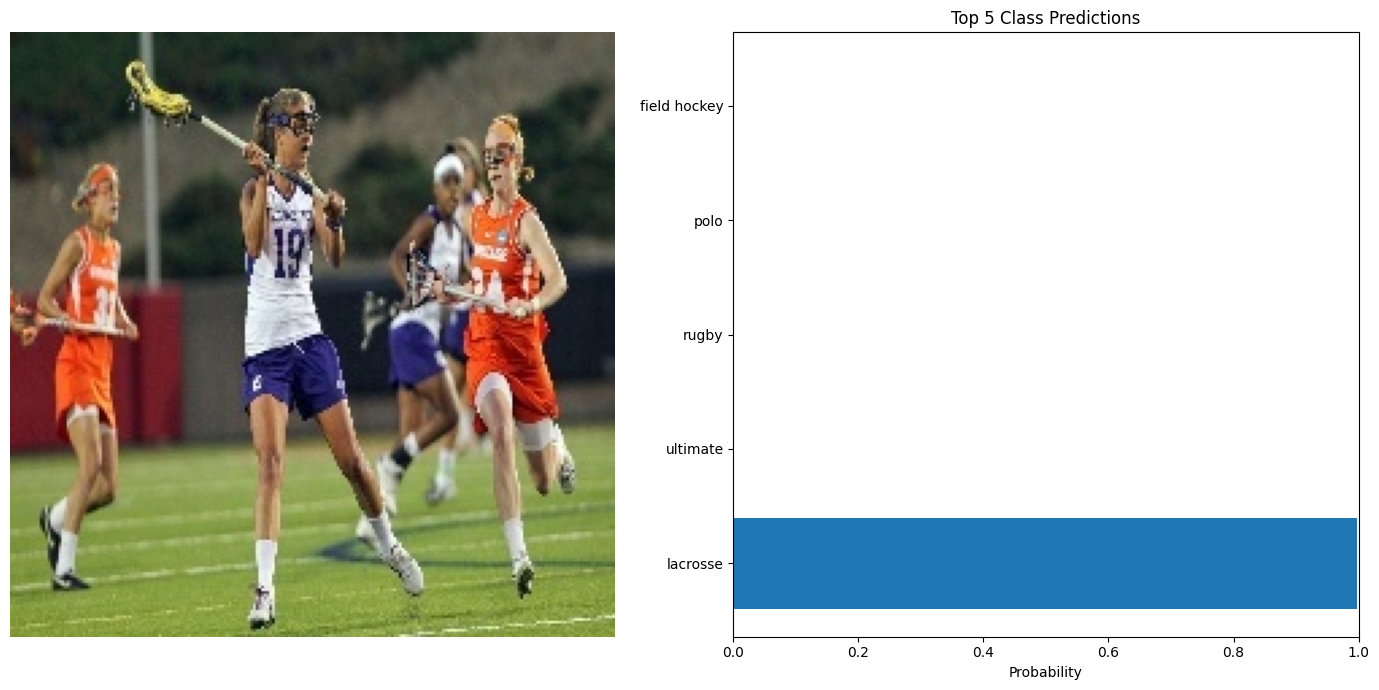

In [48]:
from glob import glob
test_images = glob('drive/MyDrive/sports_data/test/*/*') # * is used as a wildcard to match any sequence (ace of diamonds/3.jpg)
test_examples = np.random.choice(test_images, 1)

for example in test_examples:
    original_image, image_tensor = preprocess_image(example, transform)
    probabilities = predict(model, image_tensor, device)

    # Assuming dataset.classes gives the class names
    class_names = dataset.classes
    visualize_top5_predictions(original_image, probabilities, class_names)

# Own images

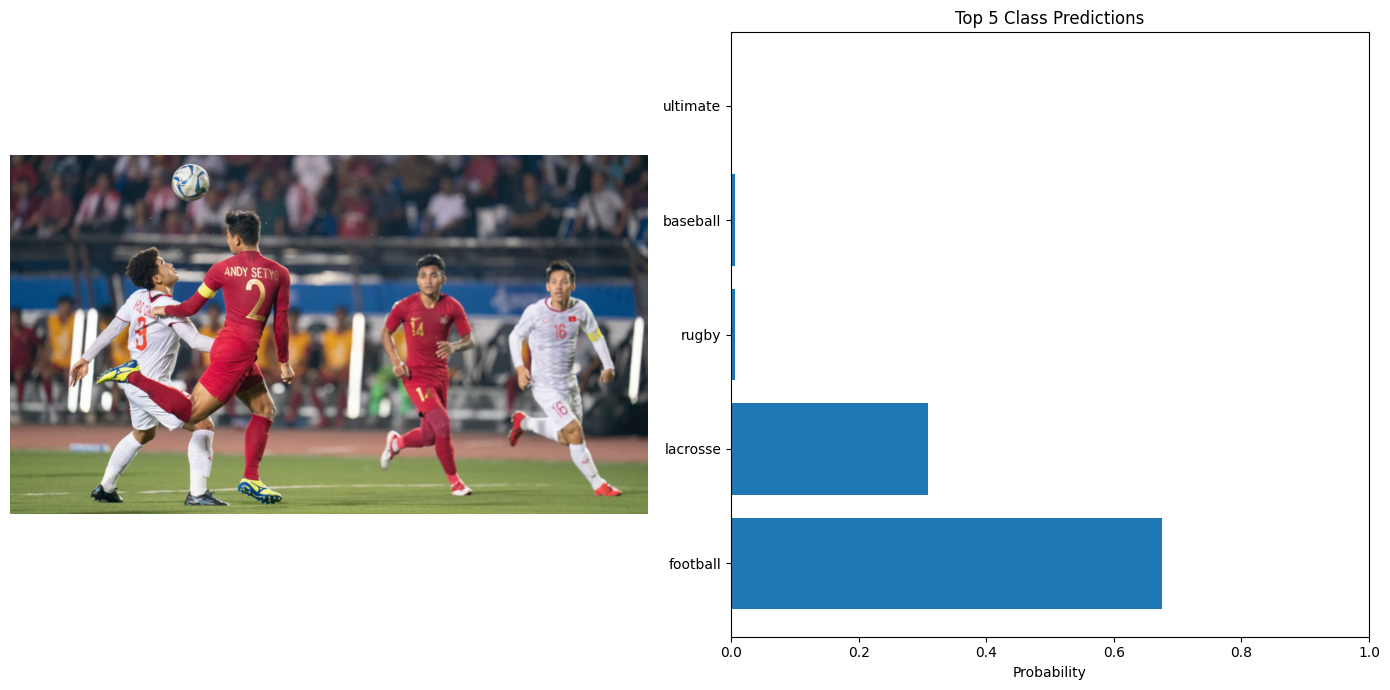

In [47]:
from glob import glob
test_images = glob('drive/MyDrive/sports_data/own/3.jpg') # * is used as a wildcard to match any sequence (ace of diamonds/3.jpg)
test_examples = np.random.choice(test_images, 1)

for example in test_examples:
    original_image, image_tensor = preprocess_image(example, transform)
    probabilities = predict(model, image_tensor, device)

    # Assuming dataset.classes gives the class names
    class_names = dataset.classes
    visualize_top5_predictions(original_image, probabilities, class_names)

# Load model using cpu

In [51]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #check for gpu(cuda)

# Create an instance of the model class
model = SportsClassifier(num_classes=100)

# Load the saved model's state dictionary onto the CPU
model.load_state_dict(torch.load('drive/MyDrive/sports_data/models/efficientnet_b0_v2.pth', map_location=torch.device('cpu')))

# Move the model to the CPU for inference
model.to(torch.device('cpu'))

SportsClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(32, 16, kernel

# Test images using CPU

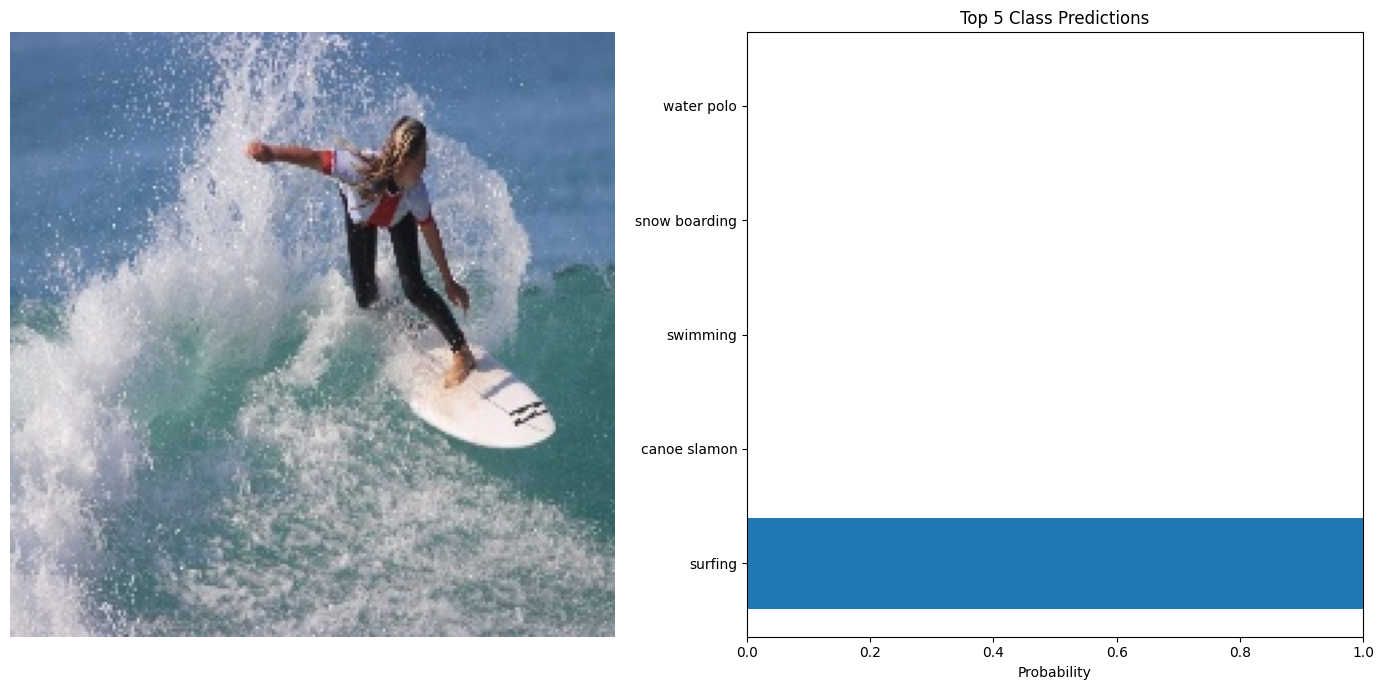

In [52]:
from glob import glob
test_images = glob('drive/MyDrive/sports_data/test/*/*') # * is used as a wildcard to match any sequence (ace of diamonds/3.jpg)
test_examples = np.random.choice(test_images, 1)

for example in test_examples:
    original_image, image_tensor = preprocess_image(example, transform)
    probabilities = predict(model, image_tensor, device)

    # Assuming dataset.classes gives the class names
    class_names = dataset.classes
    visualize_top5_predictions(original_image, probabilities, class_names)

In [50]:
import torch
import timm

# Replace 'efficientnet_b0' with the specific variant you are using (e.g., 'efficientnet_b1', 'efficientnet_b2', etc.)
model = timm.create_model('efficientnet_b0', pretrained=True)

# Check the output feature dimension
output_feature_dim = model.classifier.in_features

print(f"Output Feature Dimension: {output_feature_dim}")


Output Feature Dimension: 1280
